 Import Libs

In [1]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

Import Dataset

In [2]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)


11490434/11490434 [==============================] - 0s 0us/step


Model trianing

In [8]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10)
model.save('digits.model')
loss, accuracy=model.evaluate(x_test, y_test)
print("Loss:",loss)
print("Accu:",accuracy)





Epoch 1/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2622 - accuracy: 0.9241
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1068 - accuracy: 0.9671
Epoch 3/3
313/313 [==============================] - 0s 1ms/step - loss: 0.0945 - accuracy: 0.9708
Loss: 0.09454641491174698
Accu: 0.97079998254776


Test

In [ ]:
for i in range(1,20):
  file_name=f"/content/digits/digit{i}.png"
  img = cv2.imread(file_name)[:,:,0]
  img = np.invert(np.array([img]))
  prediction = model.predict(img)
  print(f"The number is probably a {np.argmax(prediction)}")
  plt.imshow(img[0], cmap=plt.cm.binary)
  plt.show()


Classification report

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0123 - accuracy: 0.9959
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0092 - accuracy: 0.9968
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0103 - accuracy: 0.9963
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0098 - accuracy: 0.9968
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0079 - accuracy: 0.9973
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0085 - accuracy: 0.9971
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0079 - accuracy: 0.9973
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0094 - accuracy: 0.9970
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0048 - accuracy: 0.9984
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.008

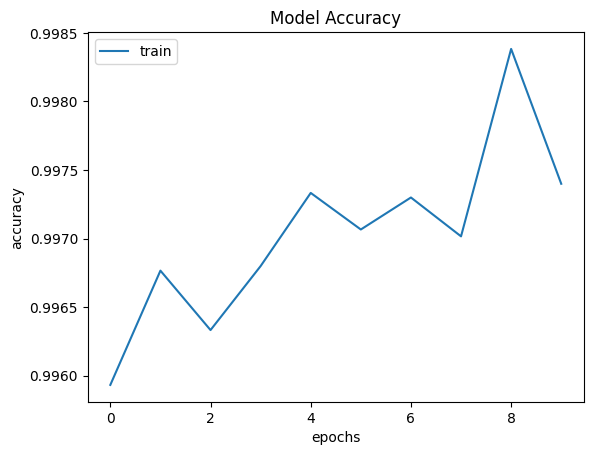

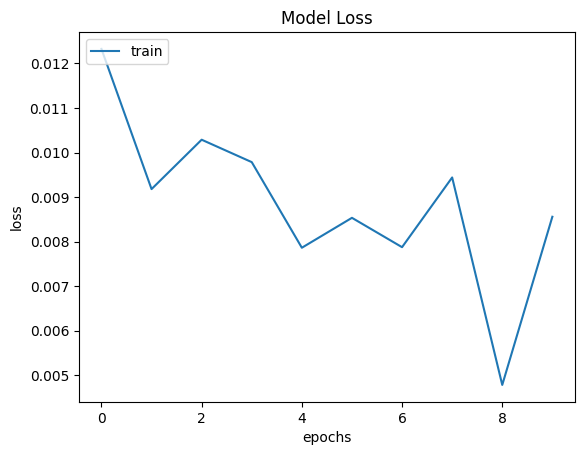

In [15]:
history=model.fit(x_train, y_train, epochs=10)
plt.plot(history.history['accuracy'])
plt.title("Model Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(['train'],loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.title("Model Loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(['train'],loc='upper left')
plt.show()